In [1]:
import pandas as pd
import numpy as np
import seaborn

In [4]:
%matplotlib inline

In [2]:
df = pd.read_csv('../data/train.csv.zip')

In [8]:
df_test = pd.read_csv('../data/test.csv.zip')

In [10]:
df_test.Id.isin(df.Id).sum()

0

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,4357336.0,3.102678e+06,1.797477e+06,0.0,1.537746e+06,3.110606e+06,4.657295e+06,6224522.0
groupId,4357336.0,1.024777e+06,6.967197e+05,1.0,4.741378e+05,9.430320e+05,1.418544e+06,2700605.0
matchId,4357336.0,2.385539e+04,1.378227e+04,0.0,1.191400e+04,2.383700e+04,3.580100e+04,47733.0
assists,4357336.0,2.656320e-01,6.342160e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,20.0
boosts,4357336.0,9.636856e-01,1.560643e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,18.0
damageDealt,4357336.0,1.329033e+02,1.699439e+02,0.0,0.000000e+00,8.776000e+01,1.884000e+02,6384.0
DBNOs,4357336.0,6.901455e-01,1.191514e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,63.0
headshotKills,4357336.0,2.385866e-01,6.103033e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,26.0
heals,4357336.0,1.187169e+00,2.366389e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,59.0
killPlace,4357336.0,4.703440e+01,2.732772e+01,1.0,2.300000e+01,4.700000e+01,7.000000e+01,100.0


/Users/bchnge/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


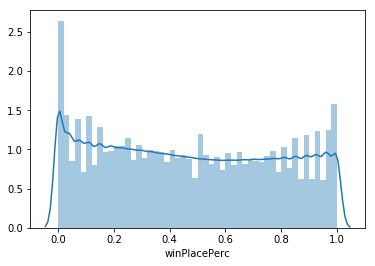

In [5]:
seaborn.distplot(df.winPlacePerc)

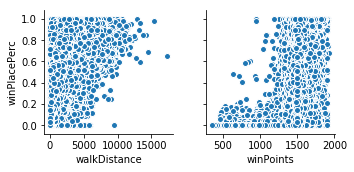

In [11]:
seaborn.pairplot(df, x_vars= ['walkDistance', 'winPoints'], y_vars='winPlacePerc')

In [95]:
def logit(x, eps = 0.0001):
    if x == 1:
        x -= eps
    elif x == 0:
        x += eps
    return(np.log(x / (1-x)))

def inv_logit(y, eps = 0.0001):
    back_transform = np.exp(y) / (1 + np.exp(y))
    if back_transform == eps:
        back_transform -= eps
    elif back_transform == 1- eps:
        back_transform += eps
    return(back_transform)


In [63]:
logit(0.7)

0.84729786038720345

In [65]:
inv_logit(logit(0))

9.9999999999999991e-05

In [68]:
df['ln_winPlacePerc'] = df.winPlacePerc.transform(lambda x: logit(x))

/Users/bchnge/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


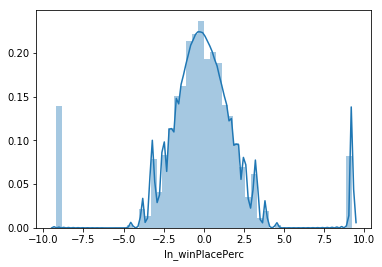

In [69]:
seaborn.distplot(df.ln_winPlacePerc)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
ols = LinearRegression()

In [72]:
from sklearn.model_selection import cross_val_score

In [74]:
from sklearn.metrics import mean_squared_error

In [73]:
from sklearn.metrics import make_scorer

In [114]:
np.array([1,2,3]).reshape(-1,1).reshape(-1)

array([1, 2, 3])

In [115]:
def logit_mse(y, y_pred):
    y_fitted = np.apply_along_axis(inv_logit, 1, y_pred.reshape(-1,1)).reshape(-1)
    return(mean_squared_error(y, y_fitted))
    
logit_mse_scorer = make_scorer(logit_mse, greater_is_better = False)

In [116]:
cv = cross_val_score(ols, 
                X = df.drop(['winPlacePerc', 'ln_winPlacePerc'], axis = 1),
                y = df.ln_winPlacePerc, scoring = logit_mse_scorer)

In [117]:
cv

array([-8.49336575, -8.46608141, -8.42014367])

In [100]:
ols.fit(df.drop(['winPlacePerc', 'ln_winPlacePerc'], axis = 1), df.ln_winPlacePerccePerc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
yhat = ols.predict(df.drop(['winPlacePerc', 'ln_winPlacePerc'], axis = 1))

In [107]:
np.apply_along_axis(inv_logit, 1, yhat.reshape(-1,1))

array([[ 0.77510209],
       [ 0.14912654],
       [ 0.8867955 ],
       ..., 
       [ 0.44873953],
       [ 0.01944806],
       [ 0.83421695]])